#SPBVL Dataset preprocessing


In [ ]:
import pandas as pd
data = pd.read_csv("monthly_data_spbvl.csv")

In [ ]:
data.head()

,Unnamed: 0,"('Adj Close', '^SPBLPGPT')","('Close', '^SPBLPGPT')","('High', '^SPBLPGPT')","('Low', '^SPBLPGPT')","('Open', '^SPBLPGPT')","('Volume', '^SPBLPGPT')",index
0,1997-03-31,1673.719971,1673.719971,1679.280029,1670.510010,1675.089966,0.0,NaN
1,1997-04-30,1758.770020,1758.770020,1761.310059,1747.449951,1750.969971,0.0,NaN
2,1997-05-31,2128.389893,2128.389893,2132.219971,2043.229980,2051.649902,0.0,NaN
3,1997-06-30,2155.010010,2155.010010,2175.600098,2154.870117,2174.669922,0.0,NaN
4,1997-07-31,2052.620117,2052.620117,2103.080078,2052.500000,2101.179932,0.0,NaN


In [ ]:
#copy the values in the first colum and the last column that are not null, to another created column called close
data['close'] = data.iloc[:, 1]
data['close'] = data['close'].where(data['close'].notnull(), data.iloc[:, -2])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  333 non-null    object 
 1   ('Adj Close', '^SPBLPGPT')  295 non-null    float64
 2   ('Close', '^SPBLPGPT')      295 non-null    float64
 3   ('High', '^SPBLPGPT')       295 non-null    float64
 4   ('Low', '^SPBLPGPT')        295 non-null    float64
 5   ('Open', '^SPBLPGPT')       295 non-null    float64
 6   ('Volume', '^SPBLPGPT')     295 non-null    float64
 7   index                       122 non-null    float64
 8   close                       333 non-null    float64
dtypes: float64(8), object(1)
memory usage: 23.5+ KB


In [ ]:
#name the first column date and make it the index
#only take the first column and the last column
data = data.iloc[:, [0, -1]]
data.columns = ['date', 'close']
data = data.set_index('date')

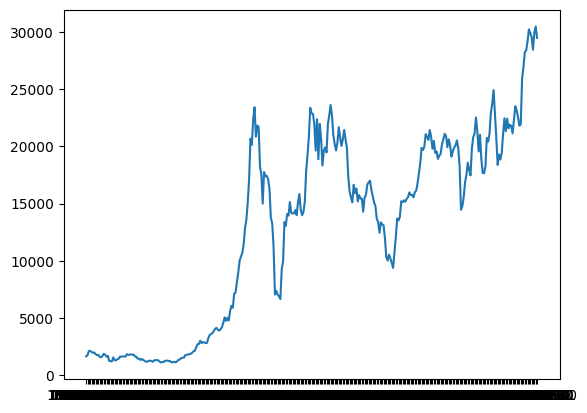

In [ ]:
import matplotlib.pyplot as plt
plt.plot(data)

In [ ]:
data.head()

,close
date,
1997-03-31,1673.719971
1997-04-30,1758.770020
1997-05-31,2128.389893
1997-06-30,2155.010010
1997-07-31,2052.620117


In [ ]:
#save the dataframe to csv
data.to_csv("spbvl.csv")

#Read SPBVL Data

In [ ]:
data = pd.read_csv("spbvl.csv")

In [ ]:
#increase the dates by one in date column
data['date'] = pd.to_datetime(data['date'])
data['date'] = data['date'] + pd.DateOffset(days=1)


# SPBVL Merge with Global ONI index

In [ ]:
# When reading the oni csv file, you need to specify 'date' as index_col
oni= pd.read_csv("oni-filtered.csv")
#convert date column to datetime
oni['date'] = pd.to_datetime(oni['date'])

In [ ]:
data.head()

,date,close
0,1997-04-01,1673.719971
1,1997-05-01,1758.770020
2,1997-06-01,2128.389893
3,1997-07-01,2155.010010
4,1997-08-01,2052.620117


In [ ]:
oni.head()

,date,oni
0,1950-01-01,-1.53
1,1950-02-01,-1.34
2,1950-03-01,-1.16
3,1950-04-01,-1.18
4,1950-05-01,-1.07


In [ ]:
#only pereserve sst and date column
oni = oni[['date', 'oni']]
#remove na
oni = oni.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 333 entries, 0 to 332
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    333 non-null    datetime64[ns]
 1   close   333 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.3 KB


In [ ]:
#merge data and oni on date column
data = pd.merge(data, oni, on='date', how='left')

In [ ]:
#remove null rows
data = data.dropna()

In [ ]:
#plot standardized oni and close data on timeseries plot with standardscale standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['close_std'] = scaler.fit_transform(data[['close']])
data['oni_std'] = scaler.fit_transform(data[['oni']])
#data['sst_std'] = scaler.fit_transform(data[['sst']])

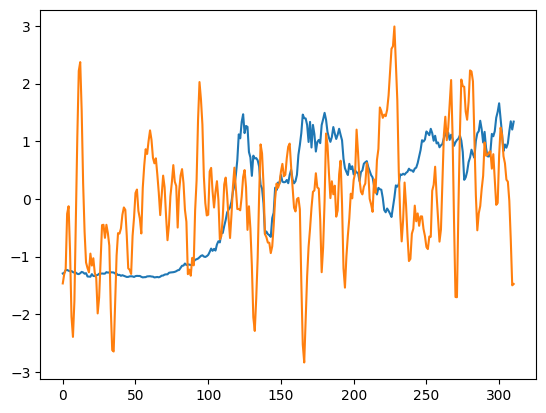

In [ ]:
#plot standardizrd columns
plt.plot(data['close_std'])
#plt.plot(data['oni_std'])
plt.plot(data['sst_std'])

In [ ]:
#save the data
data.to_csv("spbvl-oni-global.csv")

# SPBVL Merge with MANUAL ONI index - v1

In [ ]:
import pandas as pd
oni_gt = pd.read_csv("oni-manual-v1.csv")

In [ ]:
oni_gt = oni_gt[['time','sst']]

In [ ]:
#remove null
oni_gt = oni_gt.dropna()

In [ ]:
#take the data after 1997
oni_gt[oni_gt['time'] > '1996-12-31'].head()

,time,sst
184,1997-01-01,-0.453339
185,1997-02-01,-0.358504
186,1997-03-01,-0.155152
187,1997-04-01,0.145694
188,1997-05-01,0.577069


In [ ]:
data.head()

,date,close,oni,close_std,oni_std
0,1997-04-01,1673.719971,0.28,-1.320957,0.357487
1,1997-05-01,1758.770020,0.75,-1.310696,0.875919
2,1997-06-01,2128.389893,1.22,-1.266105,1.394350
3,1997-07-01,2155.010010,1.60,-1.262893,1.813508
4,1997-08-01,2052.620117,1.90,-1.275246,2.144421


In [ ]:
#convert time column to datetime
oni_gt['time'] = pd.to_datetime(oni_gt['time'])
# merge this data on time column to the date column of the previous data, and incorporate Neutral column as gt_oni
data = pd.merge(data, oni_gt, left_on='date', right_on='time', how='left')

In [ ]:
data.head()

,date,close,oni,close_std,oni_std,time,sst
0,1997-04-01,1673.719971,0.28,-1.320957,0.357487,1997-04-01,0.145694
1,1997-05-01,1758.770020,0.75,-1.310696,0.875919,1997-05-01,0.577069
2,1997-06-01,2128.389893,1.22,-1.266105,1.394350,1997-06-01,1.048204
3,1997-07-01,2155.010010,1.60,-1.262893,1.813508,1997-07-01,1.463185
4,1997-08-01,2052.620117,1.90,-1.275246,2.144421,1997-08-01,1.764803


In [ ]:
#remove nan values
data = data.dropna()


In [ ]:
#plot standardized oni and close data on timeseries plot with standardscale standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['close_std'] = scaler.fit_transform(data[['close']])
#data['oni_std'] = scaler.fit_transform(data[['oni']])

In [ ]:
#normalize the neutral column
data['sst_std'] = scaler.fit_transform(data[['sst']])

In [ ]:
#save data as csv
data.to_csv("spbvl-oni-manual-v1.csv")

# SPBVL Merge with MANUAL ONI index -v2

In [ ]:
import pandas as pd
oni_gt = pd.read_csv("oni-manual-v2.csv")

In [ ]:
oni_gt = oni_gt[['time','sst']]

In [ ]:
#remove null
oni_gt = oni_gt.dropna()

In [ ]:
#take the data after 1997
oni_gt[oni_gt['time'] > '1996-12-31'].head()

,time,sst
184,1997-01-01,-0.332252
185,1997-02-01,-0.364872
186,1997-03-01,-0.294960
187,1997-04-01,-0.164279
188,1997-05-01,-0.117819


In [ ]:
data.head()

,date,close
0,1997-04-01,1673.719971
1,1997-05-01,1758.770020
2,1997-06-01,2128.389893
3,1997-07-01,2155.010010
4,1997-08-01,2052.620117


In [ ]:
#convert time column to datetime
oni_gt['time'] = pd.to_datetime(oni_gt['time'])
# merge this data on time column to the date column of the previous data, and incorporate Neutral column as gt_oni
data = pd.merge(data, oni_gt, left_on='date', right_on='time', how='left')

In [ ]:
data.head()

,date,close,close_std,time,sst
0,1997-04-01,1673.719971,-1.320089,1997-04-01,-0.164279
1,1997-05-01,1758.770020,-1.309980,1997-05-01,-0.117819
2,1997-06-01,2128.389893,-1.266044,1997-06-01,-0.093682
3,1997-07-01,2155.010010,-1.262880,1997-07-01,0.185050
4,1997-08-01,2052.620117,-1.275051,1997-08-01,0.222526


In [ ]:
#remove nan values
data = data.dropna()


In [ ]:
#plot standardized oni and close data on timeseries plot with standardscale standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data['close_std'] = scaler.fit_transform(data[['close']])
#data['oni_std'] = scaler.fit_transform(data[['oni']])

In [ ]:
#normalize the neutral column
data['sst_std'] = scaler.fit_transform(data[['sst']])

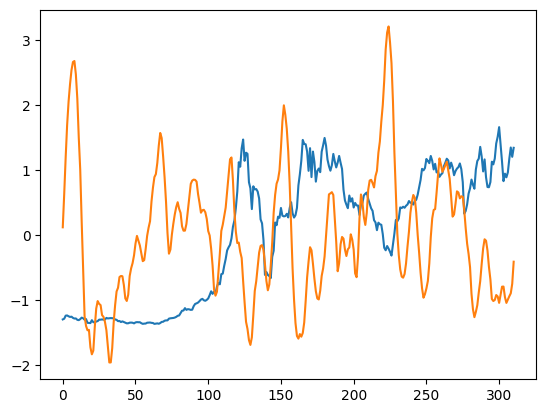

In [ ]:
#plot standardizrd columns
plt.plot(data['close_std'])
#plt.plot(data['oni_std'])
plt.plot(data['sst_std'])

In [ ]:
#save data as csv
data.to_csv("spbvl-oni-manual-v2.csv")